In [1]:
import sys
sys.path.append('/work/mratti/CoffBHNL/coffea/') # to use the local version

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
#from coffea.nanoaod import NanoEvents
from coffea.nanoevents import NanoEventsFactory
import awkward1 as ak

#fname = "/work/manzoni/bhnl/CMSSW_10_2_15/src/PhysicsTools/BParkingNano/test/BParkNANO_mc_10215.root"
fname = '/work/mratti/BParkingNano/CMSSW_10_2_15/src/PhysicsTools/BParkingNano/test/BParkNANO_mc_10215.root'
#events = NanoEventsFactory.from_file(fname)
factory = NanoEventsFactory.from_file(fname)
events = factory.events()

In [4]:
events.Bmeson.pt[3][2] # first index is event (row), second index is Bmeson (column)

18.90081214904785

In [5]:
(events.Bmeson.matched_muon.matched_gen[3]).shape == (events.Bmeson.matched_muon[3]).shape

True

In [6]:
(abs(events.Bmeson.matched_muon.matched_gen.pdgId)==13).shape == events.Bmeson.pt.shape

#events.Bmeson.matched_muon[2][2]

True

In [12]:
events.Bmeson

<BmesonArray [[Bmeson, Bmeson, ... Bmeson, Bmeson]] type='125 * var * bmeson'>

In [13]:
events.Bmeson[events.Bmeson.pt>23]

<BmesonArray [[], [Bmeson, Bmeson], ... [], [], []] type='125 * var * bmeson'>

In [14]:
events.Bmeson.pt>20

<Array [[False, False, ... False, False]] type='125 * var * bool'>

In [19]:
ak.num(events.Bmeson[events.Bmeson.pt>20])

<Array [0, 2, 1, 2, 2, 4, ... 0, 0, 0, 0, 2, 0] type='125 * int64'>

In [22]:
abs(events.Bmeson.matched_muon.matched_gen.pdgId)==13

<Array [[None, None, None, ... True, True]] type='125 * var * ?bool'>

In [162]:
events['Bmeson', 'field'] = abs(events.Bmeson.matched_muon.matched_gen.pdgId)
events.Bmeson.field

<Array [[None, None, None, ... 13, 13, 13]] type='125 * var * ?int32'>

In [192]:
ak.num(events.Bmeson[events.Bmeson.field==211])

<Array [4, 2, 14, 0, 2, 4, ... 0, 2, 5, 0, 0] type='125 * int64'>

In [55]:
bmeson_mask_1 = abs(events.Bmeson.matched_muon.matched_gen.pdgId)==1
bmeson_mask_2 = abs(events.Bmeson.matched_muon.matched_gen.pdgId)==13 & abs(events.Bmeson.matched_muon.matched_gen.parent.pdgId) == 9900015
bmeson_mask_3 = abs(events.Bmeson.matched_muon.matched_gen.pdgId)==13 & abs(events.Bmeson.matched_muon.matched_gen.parent.pdgId) == 9900015 & abs(events.Bmeson.matched_muon.matched_gen.parent.parent.pdgId) == 521



In [56]:
ak.flatten(bmeson_mask_1)

<Array [None, None, None, ... True, True, True] type='2308 * ?bool'>

In [57]:
events.Bmeson[1]

<BmesonArray [Bmeson, Bmeson, ... Bmeson, Bmeson] type='22 * bmeson'>

In [52]:
events.Bmeson[bmeson_mask_1][1]

<BmesonArray [Bmeson, Bmeson, ... Bmeson, Bmeson] type='22 * ?bmeson'>

In [53]:
events.Bmeson[bmeson_mask_2][1]

<BmesonArray [None, None] type='2 * ?bmeson'>

In [54]:
events.Bmeson[bmeson_mask_3][1]

<BmesonArray [Bmeson, Bmeson, None, ... Bmeson, None] type='22 * ?bmeson'>

### The above don't make sense!! next results cannot be trusted

In [32]:
ak.num(events.Bmeson[bmeson_mask_3])

<Array [4, 22, 14, 26, 19, ... 1, 2, 20, 11, 7] type='125 * int64'>

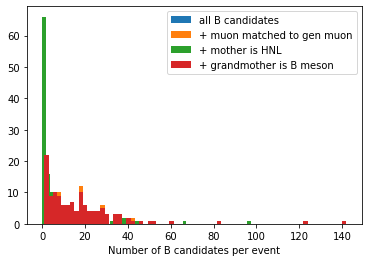

In [279]:
# how many B candidates per event
plt.hist(ak.num(events.Bmeson), bins=70, label='all B candidates')
plt.hist(ak.num(events.Bmeson[bmeson_mask_1]), label='+ muon matched to gen muon', bins=70)
plt.hist(ak.num(events.Bmeson[bmeson_mask_2]), label='+ mother is HNL', bins=70)
plt.hist(ak.num(events.Bmeson[bmeson_mask_3]), label='+ grandmother is B meson', bins=70)
plt.xlabel('Number of B candidates per event')
plt.legend()

In [ ]:
# How to create a new column
events["Bmeson", "isGenMatched"] = ( abs(events.Bmeson.matched_muon.matched_gen.pdgId) == 13 
                                   & abs(events.Bmeson.matched_muon.matched_gen.parent.pdgId) == 9900015)
                                   #& abs(events.Bmeson.matched_muon.matched_gen.parent.parent.pdgId) == 521
                                   #& abs(events.Bmeson.matched_probeTracks.matched_gen.pdgId) == 211 )

In [283]:
#ak.to_list(events.Bmeson.isGenMatched)
events.Bmeson[bmeson_mask_3].mass # still the original array, but with None for Bmesons that do not pass the gen matching requirement
# rows are events, columns are B mesons or None

<Array [[None, None, None, ... None, None]] type='125 * var * ?float32[parameter...'>

In [282]:
# the mass of those B mesons, flattened
events.Bmeson[events.Bmeson.pt>34].mass

<Array [[], [36.8, 36.9], ... [], [], []] type='125 * var * float32[parameters={...'>

In [ ]:
# now remove the None (?)

In [237]:
#plt.hist(ak.flatten(events.Bmeson[bmeson_mask_3].mass), bins=70)
#plt.legend()

(array([472., 346., 492., 107.,  18.,   6.,  25.,  17.,   9.,  16.,  17.,
          5.,  14.,   1.,   9.,  18.,   6.,   5.,   3.,   0.,  11.,   5.,
          1.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,
          3.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([  0.66064453,   3.61444092,   6.5682373 ,   9.52203369,
         12.47583008,  15.42962646,  18.38342285,  21.33721924,
         24.29101562,  27.24481201,  30.1986084 ,  33.15240479,
         36.10620117,  39.05999756,  42.01379395,  44.96759033,
         47.92138672,  50.87518311,  53.82897949,  56.78277588,
         59.73657227,  62.69036865,  65.64416504,  68.59796143,
         71.55175781,  74.5055542 ,  77.45935059,  80.41314697,
         83.36694336,  86.32073975,  89.27453613,  92.22833252,
         95.18212891,  98.13592529, 101.08972168, 104.04351807,
        106.99731445, 109.95111084, 112.90490723, 115.85870361,
        118.8125    ]),
 <BarContainer object of 40 artists>)

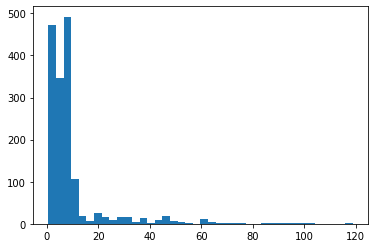

In [287]:
plt.hist(ak.flatten(events.Bmeson[events.Bmeson.pt>12].mass), bins=40)

In [289]:
ak.flatten(events.Bmeson[events.Bmeson.pt>12].mass)

<Array [20.5, 14.1, 12.1, ... 8.65, 2.34, 5.62] type='1617 * float32[parameters=...'>

In [291]:
mmevents = events[ak.num(events.Muon) == 2]
zmm = mmevents.Muon[:, 0] + mmevents.Muon[:, 1]
zmm.mass

<Array [10.3, 1.49, 2.72, ... 6.32, 2.13, 23.3] type='58 * float32'>

In [321]:
# 
masses = ak.flatten(events.Bmeson[bmeson_mask_3].mass)
masses

#plt.hist(masses, bins=50) # won't work, because of the Nones...

<Array [None, None, None, ... None, None, None] type='2253 * ?float32[parameters...'>

In [345]:
ak.count(events.Bmeson.eta) ==  ak.count(events.Bmeson.pt)
print(ak.count(events.Bmeson.eta), ak.count(events.Bmeson.eta, axis=0), ak.count(events.Bmeson.eta, axis=1))
print(ak.count(events.Bmeson))
print(ak.count(events))

2308 [125, 117, 109, 103, 99, 97, 92, 88, 81, 78, 76, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [4, 22, 14, 26, 19, 22, 12, 19, 12, 12, 9, ... 8, 19, 3, 31, 9, 17, 1, 2, 20, 11, 7]
97214
505544


In [341]:
ak.num(events.Bmeson.eta)

<Array [4, 22, 14, 26, 19, ... 1, 2, 20, 11, 7] type='125 * int64'>

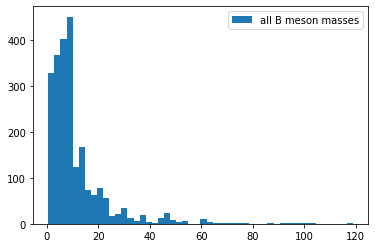

In [313]:
all_masses = ak.flatten(events.Bmeson.mass)
all_masses
plt.hist(all_masses, bins=50, label='all B meson masses') # won't work, because of the Nones...
plt.legend()

In [349]:
masses = events.Bmeson[bmeson_mask_3].mass
masses

<Array [[None, None, None, ... None, None]] type='125 * var * ?float32[parameter...'>

In [366]:
flat_masses = ak.flatten(masses)
flat_masses_noNone = ak.fill_none(flat_masses, -9)
flat_masses_noNone

<Array [-9, -9, -9, -9, ... -9, -9, -9, -9] type='2253 * union[float32[parameter...'>

In [364]:
#py_flat_masses = [i for i in py_flat_masses if i!=None ]
#py_flat_masses

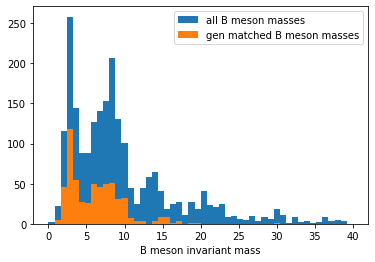

In [369]:
plt.hist(all_masses, bins=50, range=(0,40), label='all B meson masses') # won't work, because of the Nones...
plt.hist(flat_masses_noNone, bins=50, range=(0,40), label='gen matched B meson masses') # won't work, because of the Nones...
plt.xlabel('B meson invariant mass')
plt.legend()

In [370]:
from coffea import processor, hist

class MyBmesonPeak(processor.ProcessorABC):
    def __init__(self):
        self._histo = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("mass", "B mass", 100, 0, 50),
        )
    
    @property
    def accumulator(self):
        return self._histo
    
    # we will receive a NanoEvents instead of a coffea DataFrame
    def process(self, events):
        out = self.accumulator.identity()
        mmevents = events[events.Muon.counts == 2]
        zmm = mmevents.Muon[:, 0] + mmevents.Muon[:, 1]
        
        bmatched_events = events[ak.num(events.Bmeson[bmeson_mask_3])>0]
        masses = bmatched_events.Bmeson.mass
        flat_masses = ak.flatten(masses)
        masses_to_plot = ak.fill_none(flat_masses, -9)
        #masses = events.Bmeson[events.Bmeson.pt>10].mass
        # only gen-matched B mesons
        #selectedBmesons_masses = events.Bmeson[bmeson_mask_3].mass
        #print(type(selectedBmesons_masses))
        
        out.fill(
            dataset=events.metadata["dataset"],
            mass=masses_to_plot, # an array
        )
        return out
    
    def postprocess(self, accumulator):
        return accumulator
    
samples = {
    "signal": [
        fname,
    ]
}

result = processor.run_uproot_job(
    samples,
    "Events",
    MyBmesonPeak(),
    processor.iterative_executor,
    {"nano": True},
)

ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/0.2.37/src/cpu-kernels/operations.cpp#L902)

<AxesSubplot:xlabel='B mass', ylabel='Events'>

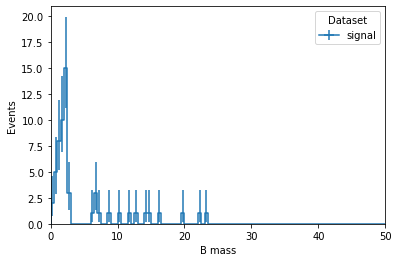

In [302]:
%matplotlib inline

hist.plot1d(result)